In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_excel(r"C:\Users\Hardik jain\Downloads\pcf_modeSoln_data_1.xlsx",sheet_name = 'SiO2-air-rings-5-dBYp-0.7')

In [3]:
dataset.head()

,core-ref-index-at-wl-1.55um,clad-ref-index,no-of-\nrings,diaBYpitch,pitch\n(um),wl\n(um),neff,Aeff\n(um^2),dispersion\n(ps/km.nm),conf-loss\n(dB/cm),conf-loss-in-log10\n(dB/cm)
0,1.444,1,5,0.7,0.8,1.80000,1.27882,4.42229,-667.351,61.270000,1.787248
1,1.444,1,5,0.7,0.8,1.58333,1.29642,2.41020,-728.993,8.273760,0.917703
2,1.444,1,5,0.7,0.8,1.41322,1.31464,1.67653,-586.632,0.766277,-0.115614
3,1.444,1,5,0.7,0.8,1.27612,1.33194,1.33156,-397.929,0.061124,-1.213790
4,1.444,1,5,0.7,0.8,1.16327,1.34753,1.13874,-230.017,0.004892,-2.310525


In [4]:
sheets_names = ['SiO2-air-rings-4-dBYp-0.8', 'SiO2-air-rings-4-dBYp-0.9',
                'SiO2-air-rings-4-dBYp-0.7', 'SiO2-air-rings-5-dBYp-0.6',
                'SiO2-air-rings-5-dBYp-0.8', 'SiO2-air-rings-5-dBYp-0.9',
                'SiO2-air-rings-4-dBYp-0.6']
for sheet_name in sheets_names:
    print(sheet_name)
    df_sheet_name = pd.read_excel(r"C:\Users\Hardik jain\Downloads\pcf_modeSoln_data_1.xlsx", sheet_name=sheet_name)
    datafile_sheet_name = df_sheet_name.values 
    datafile_1 = np.concatenate((dataset, datafile_sheet_name), axis=0)


SiO2-air-rings-4-dBYp-0.8
SiO2-air-rings-4-dBYp-0.9
SiO2-air-rings-4-dBYp-0.7
SiO2-air-rings-5-dBYp-0.6
SiO2-air-rings-5-dBYp-0.8
SiO2-air-rings-5-dBYp-0.9
SiO2-air-rings-4-dBYp-0.6


In [5]:
print(datafile_1)
print()
print(len(datafile_1))


[[ 1.44400000e+00  1.00000000e+00  5.00000000e+00 ... -6.67351000e+02
   6.12700000e+01  1.78724788e+00]
 [ 1.44400000e+00  1.00000000e+00  5.00000000e+00 ... -7.28993000e+02
   8.27376000e+00  9.17702919e-01]
 [ 1.44400000e+00  1.00000000e+00  5.00000000e+00 ... -5.86632000e+02
   7.66277000e-01 -1.15614210e-01]
 ...
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00 ...  5.64126000e+01
   3.07385000e-12 -1.15123173e+01]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00 ...  5.48488000e+01
   2.18833000e-12 -1.16598872e+01]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00 ...  5.33584000e+01
   1.59437000e-12 -1.17974109e+01]]

279


In [6]:
datafile_1.shape


(279, 11)

In [7]:
print(type(datafile_1))

<class 'numpy.ndarray'>


In [8]:
datafile_1 = pd.DataFrame(datafile_1, columns = ['core-ref-index-at-wl-1.55um','clad-ref-index','no-of-\nrings','diaBYpitch'
                                          ,'pitch\n(um)','wl\n(um)','neff','Aeff\n(um^2)','dispersion\n(ps/km.nm)'
                                          ,'conf-loss\n(dB/cm)','conf-loss-in-log10\n(dB/cm)'])

In [9]:
datafile_1 = datafile_1.rename(columns = {'no-of-\nrings':'no-of-rings', 'pitch\n(um)':'pitch(um)','wl\n(um)':'wl(um)',
                              'Aeff\n(um^2)':'Aeff(um^2)', 'dispersion\n(ps/km.nm)':'dispersion(ps/km.nm)', 
                              'conf-loss\n(dB/cm)':'conf-loss(dB/cm)', 'conf-loss-in-log10\n(dB/cm)':'conf-loss-in-log10(dB/cm)'})

In [10]:
print(type(datafile_1))

<class 'pandas.core.frame.DataFrame'>


In [11]:
datafile_1

,core-ref-index-at-wl-1.55um,clad-ref-index,no-of-rings,diaBYpitch,pitch(um),wl(um),neff,Aeff(um^2),dispersion(ps/km.nm),conf-loss(dB/cm),conf-loss-in-log10(dB/cm)
0,1.444,1.0,5.0,0.7,0.8,1.800000,1.27882,4.42229,-667.3510,6.127000e+01,1.787248
1,1.444,1.0,5.0,0.7,0.8,1.583330,1.29642,2.41020,-728.9930,8.273760e+00,0.917703
2,1.444,1.0,5.0,0.7,0.8,1.413220,1.31464,1.67653,-586.6320,7.662770e-01,-0.115614
3,1.444,1.0,5.0,0.7,0.8,1.276120,1.33194,1.33156,-397.9290,6.112370e-02,-1.213790
4,1.444,1.0,5.0,0.7,0.8,1.163270,1.34753,1.13874,-230.0170,4.891870e-03,-2.310525
...,...,...,...,...,...,...,...,...,...,...,...
274,1.444,1.0,4.0,0.6,2.0,0.589655,1.46354,4.06947,59.7799,6.578650e-12,-11.181863
275,1.444,1.0,4.0,0.6,2.0,0.564356,1.46406,4.04679,58.0559,4.431390e-12,-11.353460
276,1.444,1.0,4.0,0.6,2.0,0.541139,1.46453,4.02620,56.4126,3.073850e-12,-11.512317
277,1.444,1.0,4.0,0.6,2.0,0.519757,1.46495,4.00741,54.8488,2.188330e-12,-11.659887


In [12]:
df = datafile_1.dropna()

<AxesSubplot:>

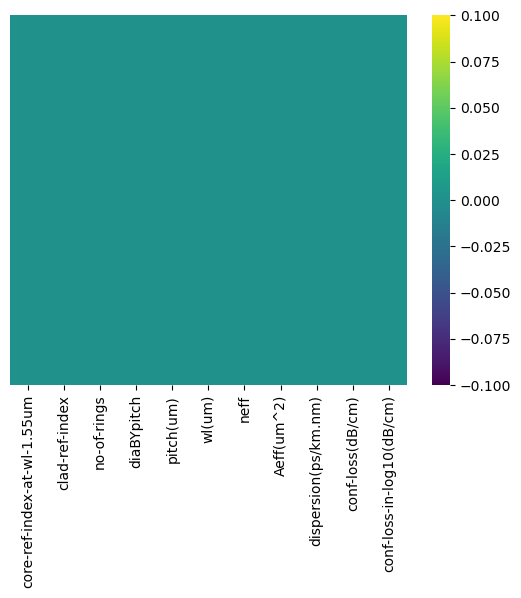

In [13]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels =False,cbar =True,cmap = 'viridis')

In [14]:
df.nunique()

core-ref-index-at-wl-1.55um      1
clad-ref-index                   1
no-of-rings                      2
diaBYpitch                       2
pitch(um)                        7
wl(um)                          20
neff                           277
Aeff(um^2)                     279
dispersion(ps/km.nm)           279
conf-loss(dB/cm)               279
conf-loss-in-log10(dB/cm)      279
dtype: int64

In [15]:
df.corr()

,core-ref-index-at-wl-1.55um,clad-ref-index,no-of-rings,diaBYpitch,pitch(um),wl(um),neff,Aeff(um^2),dispersion(ps/km.nm),conf-loss(dB/cm),conf-loss-in-log10(dB/cm)
core-ref-index-at-wl-1.55um,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clad-ref-index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no-of-rings,NaN,NaN,1.000000,1.000000,-0.005408,0.008909,-0.118867,-0.202646,0.085411,-0.068648,-0.589973
diaBYpitch,NaN,NaN,1.000000,1.000000,-0.005408,0.008909,-0.118867,-0.202646,0.085411,-0.068648,-0.589973
pitch(um),NaN,NaN,-0.005408,-0.005408,1.000000,0.013393,0.541879,0.837907,0.142262,-0.164449,-0.479366
wl(um),NaN,NaN,0.008909,0.008909,0.013393,1.000000,-0.742676,0.423808,-0.554572,0.229242,0.586700
neff,NaN,NaN,-0.118867,-0.118867,0.541879,-0.742676,1.000000,0.111007,0.742604,-0.358291,-0.690647
Aeff(um^2),NaN,NaN,-0.202646,-0.202646,0.837907,0.423808,0.111007,1.000000,-0.264715,0.191195,-0.033662
dispersion(ps/km.nm),NaN,NaN,0.085411,0.085411,0.142262,-0.554572,0.742604,-0.264715,1.000000,-0.475143,-0.488458
conf-loss(dB/cm),NaN,NaN,-0.068648,-0.068648,-0.164449,0.229242,-0.358291,0.191195,-0.475143,1.000000,0.228478


In [16]:
df.describe()

,core-ref-index-at-wl-1.55um,clad-ref-index,no-of-rings,diaBYpitch,pitch(um),wl(um),neff,Aeff(um^2),dispersion(ps/km.nm),conf-loss(dB/cm),conf-loss-in-log10(dB/cm)
count,2.790000e+02,279.0,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,2.790000e+02,279.000000
mean,1.444000e+00,1.0,4.501792,0.650179,1.402151,0.897683,1.431783,2.416703,73.881758,1.241084e+00,-10.079338
std,3.114211e-15,0.0,0.500895,0.050090,0.399814,0.363687,0.033472,1.139483,138.439313,1.071159e+01,6.056901
min,1.444000e+00,1.0,4.000000,0.600000,0.800000,0.500000,1.278820,0.639394,-728.993000,-3.031140e-21,-21.910480
25%,1.444000e+00,1.0,4.000000,0.600000,1.000000,0.603492,1.420260,1.436675,73.313250,3.272815e-15,-14.485280
50%,1.444000e+00,1.0,5.000000,0.700000,1.400000,0.760000,1.442780,2.285010,98.769100,3.999390e-10,-9.398006
75%,1.444000e+00,1.0,5.000000,0.700000,1.800000,1.068750,1.455665,3.335500,132.415500,1.542775e-06,-5.817751
max,1.444000e+00,1.0,5.000000,0.700000,2.000000,1.800000,1.465320,5.622730,243.672000,1.550150e+02,2.190374


<AxesSubplot:>

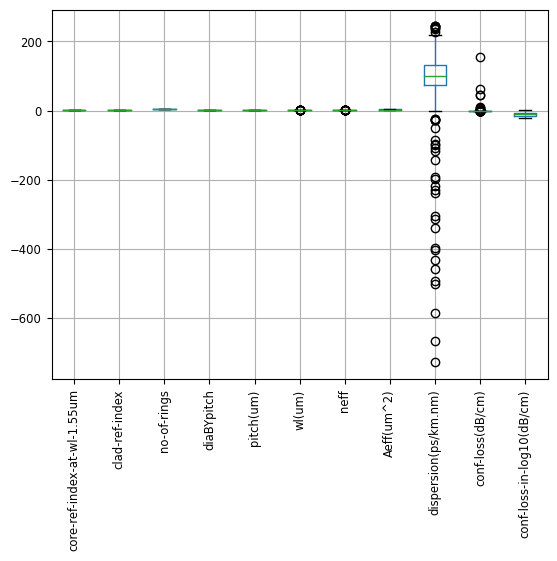

In [17]:
df.boxplot(fontsize='small',rot = 90)

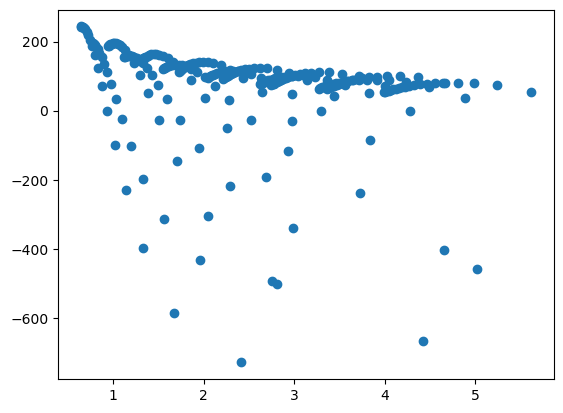

In [18]:
plt.scatter(datafile_1['Aeff(um^2)'],datafile_1['dispersion(ps/km.nm)'])

<AxesSubplot:>

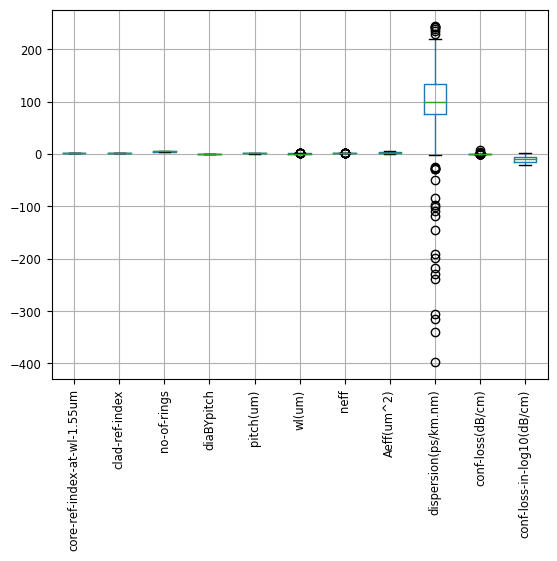

In [19]:
df = df[(df["dispersion(ps/km.nm)"] > -400) & (df["conf-loss(dB/cm)"] < 200)]
df.boxplot(fontsize ='small',rot=90)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dispersion(ps/km.nm)'>

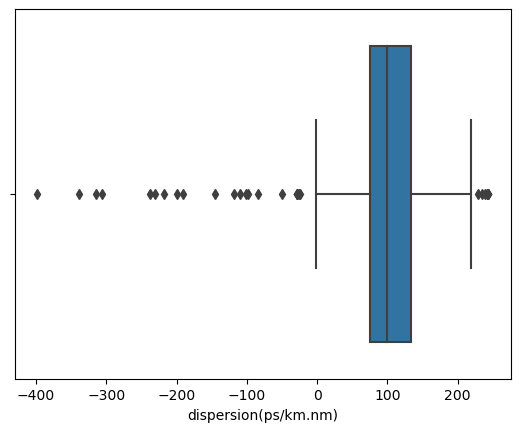

In [20]:
sns.boxplot(df["dispersion(ps/km.nm)"])


In [21]:
df25 = df["dispersion(ps/km.nm)"].quantile(0.25)
df75 = df["dispersion(ps/km.nm)"].quantile(0.75)

In [22]:
print(df75)
print(df25)

133.0905
75.42015


In [23]:
iqr = df75-df25
iqr

57.670349999999985

In [24]:
upper_limit = df75+1.5*iqr
lower_limit = df25-1.5*iqr

In [25]:
print(upper_limit)
print(lower_limit)

219.59602499999997
-11.08537499999997


# Finding Outliers

In [26]:
df[df["dispersion(ps/km.nm)"]>upper_limit]

,core-ref-index-at-wl-1.55um,clad-ref-index,no-of-rings,diaBYpitch,pitch(um),wl(um),neff,Aeff(um^2),dispersion(ps/km.nm),conf-loss(dB/cm),conf-loss-in-log10(dB/cm)
13,1.444,1.0,5.0,0.7,0.8,0.647727,1.42118,0.706059,228.374,4.058920e-11,-10.391590
14,1.444,1.0,5.0,0.7,0.8,0.617329,1.42506,0.691266,234.927,8.369790e-12,-11.077285
15,1.444,1.0,5.0,0.7,0.8,0.589655,1.42850,0.678323,239.257,1.877170e-12,-11.726496
16,1.444,1.0,5.0,0.7,0.8,0.564356,1.43156,0.666895,241.906,4.560690e-13,-12.340969
17,1.444,1.0,5.0,0.7,0.8,0.541139,1.43431,0.656724,243.279,1.195580e-13,-12.922421
18,1.444,1.0,5.0,0.7,0.8,0.519757,1.43676,0.647611,243.672,3.368650e-14,-13.472544
19,1.444,1.0,5.0,0.7,0.8,0.500000,1.43898,0.639394,243.313,1.016230e-14,-13.993008


In [27]:
df[df["dispersion(ps/km.nm)"]<lower_limit]

,core-ref-index-at-wl-1.55um,clad-ref-index,no-of-rings,diaBYpitch,pitch(um),wl(um),neff,Aeff(um^2),dispersion(ps/km.nm),conf-loss(dB/cm),conf-loss-in-log10(dB/cm)
3,1.444,1.0,5.0,0.7,0.8,1.276120,1.33194,1.33156,-397.9290,0.061124,-1.213790
4,1.444,1.0,5.0,0.7,0.8,1.163270,1.34753,1.13874,-230.0170,0.004892,-2.310525
5,1.444,1.0,5.0,0.7,0.8,1.068750,1.36118,1.01788,-98.2054,0.000416,-3.381315
21,1.444,1.0,5.0,0.7,1.0,1.583330,1.33312,2.04982,-306.3050,0.039821,-1.399893
22,1.444,1.0,5.0,0.7,1.0,1.413220,1.35214,1.70791,-144.6210,0.001703,-2.768811
23,1.444,1.0,5.0,0.7,1.0,1.276120,1.36818,1.51069,-28.3336,0.000082,-4.087224
40,1.444,1.0,5.0,0.7,1.2,1.800000,1.34216,2.68390,-191.0180,0.007591,-2.119687
41,1.444,1.0,5.0,0.7,1.2,1.583330,1.36298,2.25503,-50.4641,0.000183,-3.736935
60,1.444,1.0,5.0,0.7,1.4,1.800000,1.36691,2.98169,-28.7922,0.000072,-4.144744
143,1.444,1.0,4.0,0.6,0.8,1.163270,1.37008,1.55828,-314.8410,2.566220,0.409294


### Trimming

In [28]:
new_df = df[df["dispersion(ps/km.nm)"]>upper_limit]
new_df.shape

(7, 11)

### Capping

In [29]:
new_df_cap = df.copy()

new_df_cap["dispersion(ps/km.nm)"] = np.where(
new_df_cap["dispersion(ps/km.nm)"] >upper_limit,upper_limit,
np.where(
new_df_cap["dispersion(ps/km.nm)"] <lower_limit,lower_limit,
new_df_cap["dispersion(ps/km.nm)"])
)

In [30]:
new_df_cap.shape

(271, 11)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

<AxesSubplot:xlabel='dispersion(ps/km.nm)'>

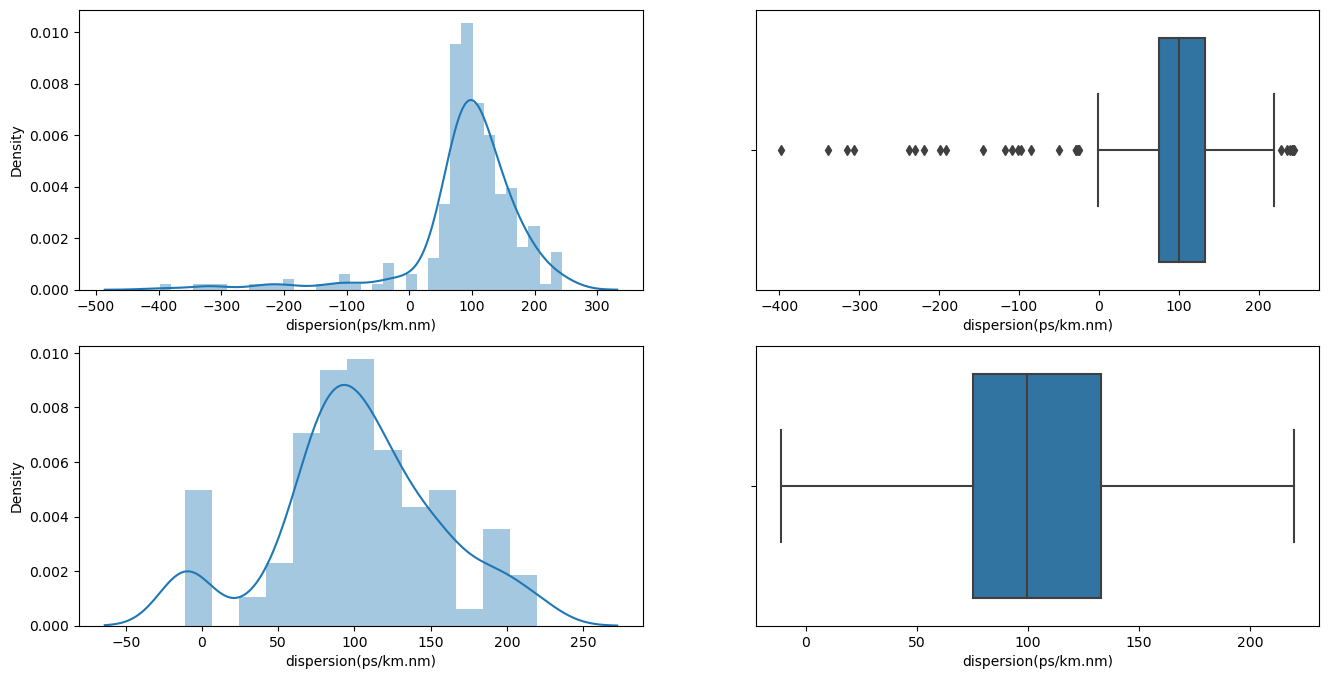

In [31]:
## Comparing 
 
plt.figure(figsize= (16,8))
plt.subplot(2,2,1)
sns.distplot(df["dispersion(ps/km.nm)"])

plt.subplot(2,2,2)
sns.boxplot(df["dispersion(ps/km.nm)"])

plt.subplot(2,2,3)
sns.distplot(new_df_cap["dispersion(ps/km.nm)"])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap["dispersion(ps/km.nm)"])

<AxesSubplot:>

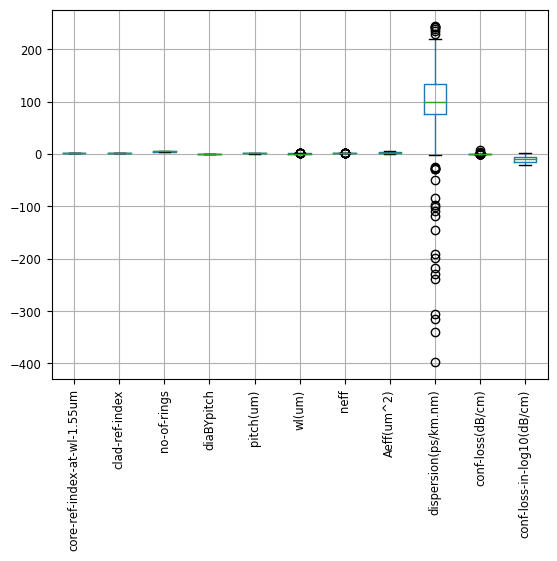

In [32]:
df.boxplot(fontsize='small',rot = 90)

In [33]:
df = new_df_cap

In [34]:
df.shape

(271, 11)

In [35]:
datafile_1 = df

In [36]:
no_of_output_nodes = 5

out_var_datafile_1 = datafile_1.iloc[:,range(6,11)]             
out_var_datafile_1 = out_var_datafile_1.values.reshape((-1,no_of_output_nodes))
print(out_var_datafile_1)
print('no. of training points: ', len(out_var_datafile_1))

[[ 1.33194000e+00  1.33156000e+00 -1.10853750e+01  6.11237000e-02
  -1.21379036e+00]
 [ 1.34753000e+00  1.13874000e+00 -1.10853750e+01  4.89187000e-03
  -2.31052509e+00]
 [ 1.36118000e+00  1.01788000e+00 -1.10853750e+01  4.15609000e-04
  -3.38131506e+00]
 ...
 [ 1.46453000e+00  4.02620000e+00  5.64126000e+01  3.07385000e-12
  -1.15123173e+01]
 [ 1.46495000e+00  4.00741000e+00  5.48488000e+01  2.18833000e-12
  -1.16598872e+01]
 [ 1.46532000e+00  3.99021000e+00  5.33584000e+01  1.59437000e-12
  -1.17974109e+01]]
no. of training points:  271


In [37]:
scaler1 = MinMaxScaler()  
scaler2 = MinMaxScaler()  

scaler1.fit(datafile_1)
scaler2.fit(out_var_datafile_1)

MinMaxScaler()

In [38]:
scaler_datafile_1 = scaler1.transform(datafile_1)
X = scaler_datafile_1[:,range(0,6)]                 ## input variables columns
y = scaler_datafile_1[:,range(6,11)]                ## output variables columns

#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=50,test_size = 0.3)

In [39]:
X_train.shape

(189, 6)

In [40]:
y_train.shape

(189, 5)

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [42]:
X_train

array([[0.        , 0.        , 0.        , 0.        , 0.66666667,
        0.27638154],
       [0.        , 0.        , 1.        , 1.        , 0.33333333,
        0.01519769],
       [0.        , 0.        , 0.        , 0.        , 0.33333333,
        0.83333077],
       ...,
       [0.        , 0.        , 1.        , 1.        , 1.        ,
        0.04950462],
       [0.        , 0.        , 1.        , 1.        , 0.83333333,
        0.11363615],
       [0.        , 0.        , 0.        , 0.        , 0.33333333,
        0.4375    ]])

In [43]:
y_train

array([[8.85365122e-01, 4.57026378e-01, 4.79022041e-01, 1.26792491e-09,
        6.10092265e-01],
       [9.16104363e-01, 1.34872704e-01, 6.81387294e-01, 3.35140485e-20,
        1.46302093e-01],
       [3.73144399e-01, 4.60259152e-01, 0.00000000e+00, 3.64562594e-02,
        9.36969532e-01],
       [6.04438447e-01, 2.05779020e-01, 6.59365580e-01, 7.33580973e-11,
        5.55852339e-01],
       [7.93822162e-01, 6.80298499e-01, 4.83022797e-01, 8.97869988e-16,
        3.40573203e-01],
       [9.01709402e-01, 4.47462503e-01, 4.72124649e-01, 4.93734556e-10,
        5.92141507e-01],
       [7.64282501e-01, 7.84185534e-02, 8.95739210e-01, 1.49863336e-14,
        3.94148593e-01],
       [3.07842255e-01, 5.94459214e-02, 4.77227002e-02, 4.75473388e-06,
        7.66724572e-01],
       [5.12745539e-01, 6.75065057e-01, 3.60166771e-01, 2.23725907e-09,
        6.20900529e-01],
       [8.39481182e-01, 1.52541591e-01, 7.46459728e-01, 4.43860992e-17,
        2.83338951e-01],
       [9.71959814e-01, 4.0379

In [44]:

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)
mlp = MLPRegressor(hidden_layer_sizes=(350, 350,300), activation='identity', solver='adam',alpha = 0.00001,max_iter=1800, verbose=True)
mlp = MLPRegressor(hidden_layer_sizes=(350, 350,300), activation='identity', solver='adam',alpha = 0.00001,max_iter=1800, verbose=True)
mlp = MLPRegressor(hidden_layer_sizes=(350, 350,300), activation='identity', solver='adam',alpha = 0.00001,max_iter=1800, verbose=True)
mlp = MLPRegressor(hidden_layer_sizes=(350, 350,300), activation='identity', solver='adam',alpha = 0.00001,max_iter=1800, verbose=True)


# Train the model
mlp.fit(X_train, y_train)

# Predict on test data
y_pred = mlp.predict(X_test)

# Evaluate the model
score = mlp.score(X_test, y_test)
print("Score: ", score*100)


Iteration 1, loss = 0.22725406
Iteration 2, loss = 0.03599382
Iteration 3, loss = 0.08951019
Iteration 4, loss = 0.07321039
Iteration 5, loss = 0.03042259
Iteration 6, loss = 0.01547095
Iteration 7, loss = 0.02340710
Iteration 8, loss = 0.03385384
Iteration 9, loss = 0.03467145
Iteration 10, loss = 0.02654358
Iteration 11, loss = 0.01610851
Iteration 12, loss = 0.00927405
Iteration 13, loss = 0.00836987
Iteration 14, loss = 0.01174786
Iteration 15, loss = 0.01525976
Iteration 16, loss = 0.01564365
Iteration 17, loss = 0.01296870
Iteration 18, loss = 0.00954282
Iteration 19, loss = 0.00737649
Iteration 20, loss = 0.00695522
Iteration 21, loss = 0.00761818
Iteration 22, loss = 0.00842235
Iteration 23, loss = 0.00869425
Iteration 24, loss = 0.00821291
Iteration 25, loss = 0.00718547
Iteration 26, loss = 0.00609130
Iteration 27, loss = 0.00543316
Iteration 28, loss = 0.00546790
Iteration 29, loss = 0.00603763
Iteration 30, loss = 0.00664327
Iteration 31, loss = 0.00678585
Iteration 32, los

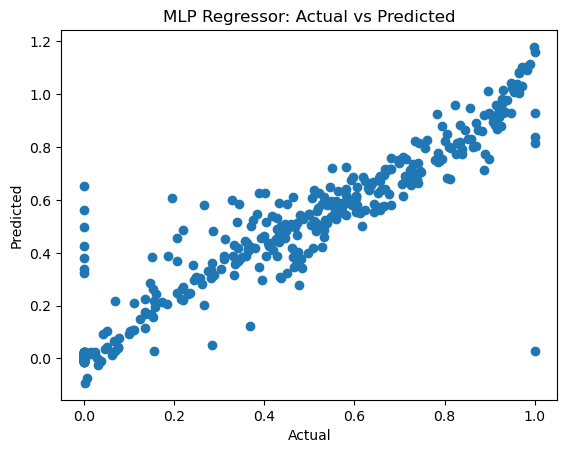

In [45]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('MLP Regressor: Actual vs Predicted')
plt.show()

In [46]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared Score: ", r2)
print('Accuracy is :',r2*100)

R-squared Score:  0.6170780808053781
Accuracy is : 61.70780808053781


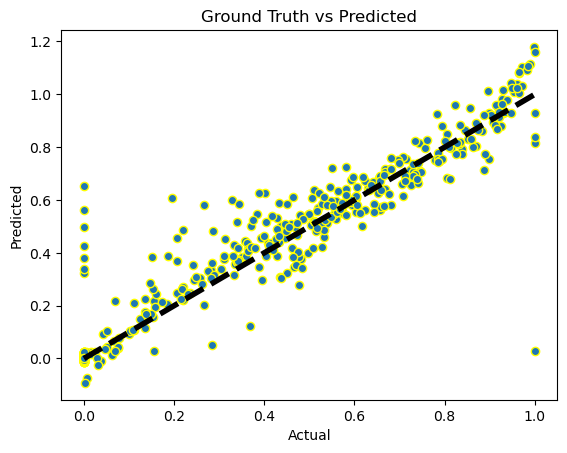

In [47]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(1, 1, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()